The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Positioning nodes


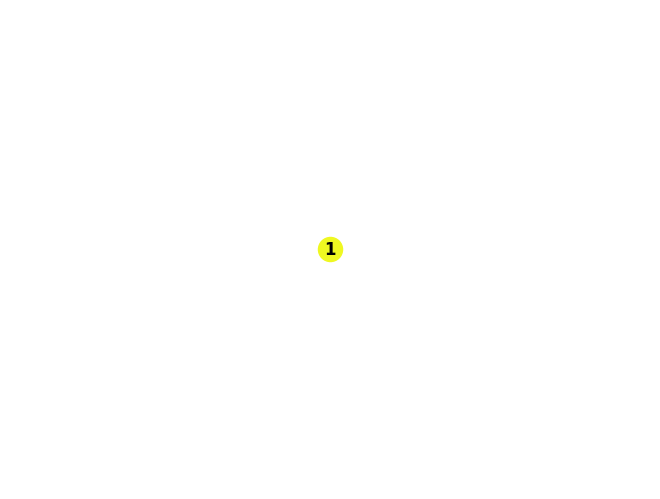

In [33]:
%load_ext autoreload
%autoreload 2
import tensorcraft as tc

from tensorcraft.viz.program_graph import draw_program_graph, draw_expression_graph

small_program = tc.compile("A[i,j] = -j -100")
tc.viz.draw_program_graph(small_program)

Positioning nodes


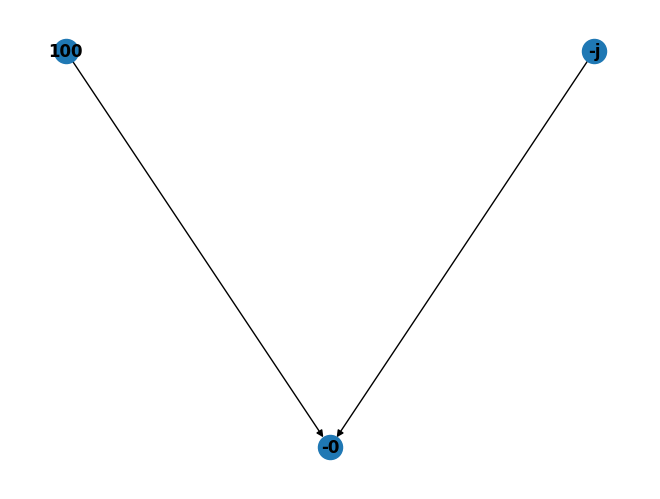

In [34]:
tc.viz.draw_expression_graph(small_program.tensor_expressions[1])

In [3]:
small_program.tensor_expressions[1]

TensorExpression(line=1, raw='A[i,j] = -B[i] * -B[j]', inputs=[('B', ['i']), ('B', ['j'])], output=('A', ['i', 'j']), loop_count=2, op_graph=<networkx.classes.digraph.DiGraph object at 0x7fba13508f70>, op_count=1)

Positioning nodes


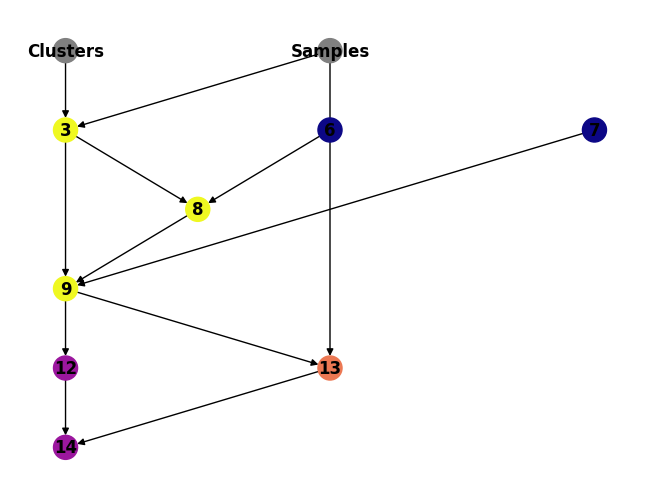

In [4]:
code = """
# Distance computation
Dist[j,k] = (Samples[j,l] - Clusters[k,l]) * (Samples[j,l] - Clusters[k,l])

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] = (Dist[j,k] < Min[j]) * (Dist[j,k] - Min[j])
Labels[j] = (Dist[j,k] == Min[j]) * (k - Labels[j])

# Cluster update
Count[l] = (Labels[j] == l)
Update[l,k] = Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

draw_program_graph(kmeans_kernel, color_by="opcount")

In [5]:
kmeans_kernel.tensor_expressions[3].op_graph.nodes

NodeView(('Samples[j,l]', 'Clusters[k,l]', '-0', '-1', '*0'))

Positioning nodes


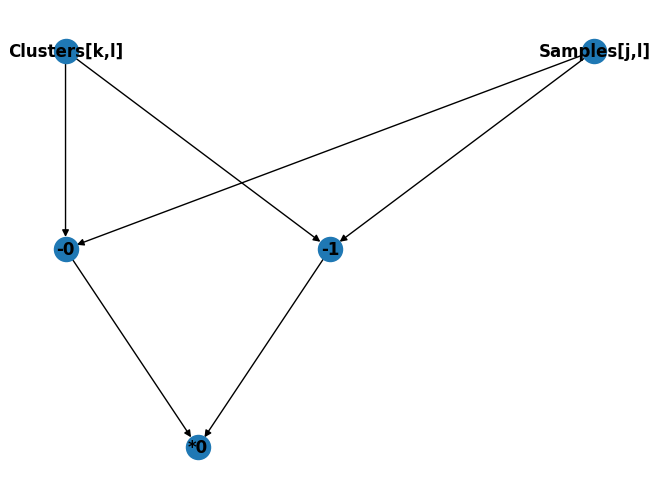

In [6]:
draw_expression_graph(kmeans_kernel.tensor_expressions[3])

Positioning nodes


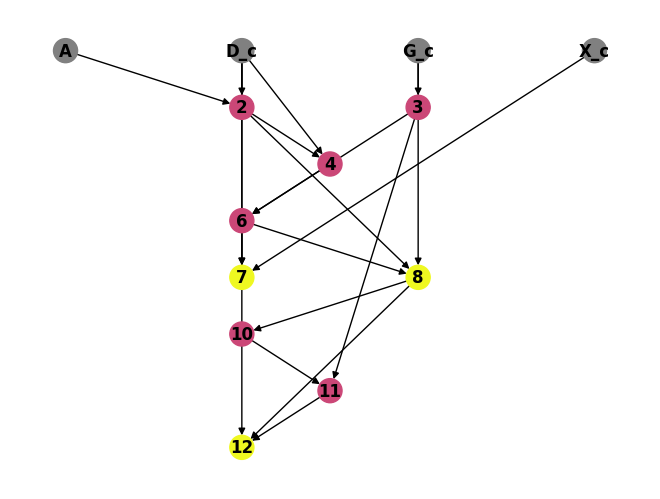

In [7]:
code = """
W_c[i] = A[i,j] * D_c[j]
Gamma_c = G_c[i] * G_c[i]
Theta_c = D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + (Alpha_c * D_c[i])
G_n[i] = G_c[i] + (Alpha_c * W_c[i])

Gamma_n = G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n = (Beta_n * D_c[i]) - G_n[i]
"""
conjugate_gradient_kernel = tc.compile(code)

draw_program_graph(conjugate_gradient_kernel, color_by='opcount')


Positioning nodes


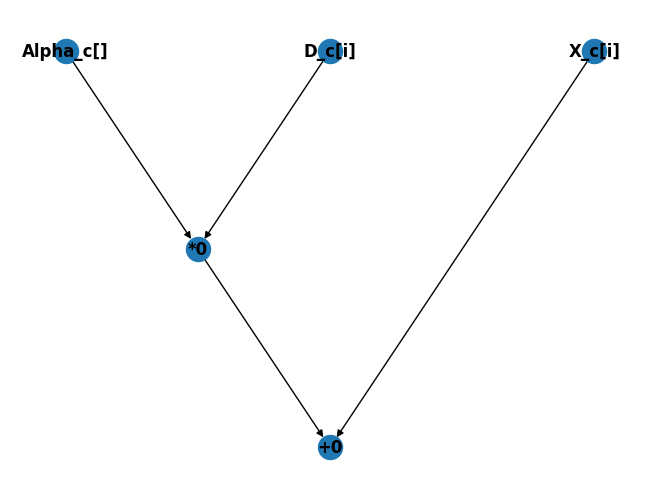

In [8]:
draw_expression_graph(conjugate_gradient_kernel.tensor_expressions[7])

In [9]:
a = eval("1 + 2")

In [10]:
import networkx as nx
graph = nx.Graph()
graph.add_node(1, neg=True)
graph.add_node(2, neg=False)
for node in graph:
    print(nx.get_node_attributes(graph, 'neg')[node])

True
False
